In [1]:
import pandas as pd
import numpy as np

In [2]:
import pymde
import hdbscan

In [10]:
t = pd.read_csv('../data/union_genes_clustered_df.csv', index_col=0)
t

,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000160087,ENSG00000127054,ENSG00000162576,ENSG00000175756,ENSG00000242485,ENSG00000160072,ENSG00000197785,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
gene_transcript,,,,,,,,,,,,,,,,,,,,,
10005_ZBTB4_P1_ENSG00000174282,-0.030201,-0.088615,0.097081,-0.050281,0.053923,0.047092,0.025221,-0.003499,-0.085795,-0.027718,...,0.319526,0.479325,0.232490,0.783892,0.759569,0.293088,0.485888,0.890428,0.252083,0.634143
10006_ZBTB5_P1P2_ENSG00000168795,-0.094131,0.093585,0.041780,0.011111,0.049495,0.068986,-0.062200,0.044283,-0.089965,-0.020776,...,0.045284,-0.076742,-0.120616,0.070922,0.016384,-0.156901,-0.037597,0.021802,0.063851,0.220182
10015_ZBTB8OS_P1P2_ENSG00000176261,0.042972,-0.122381,0.015089,-0.010220,0.021991,-0.140862,-0.131819,0.023055,-0.064811,0.027981,...,-0.091865,0.015270,0.023904,-0.119254,-0.024721,-0.149914,-0.079422,0.134310,-0.018046,0.106836
10020_ZC3H13_P1P2_ENSG00000123200,-0.120841,-0.013023,0.690666,0.369722,0.229487,0.635588,0.187934,0.145091,-0.204043,-0.203969,...,0.421244,0.118716,1.633748,0.379121,0.741676,0.302818,0.341236,-0.045770,0.586778,0.497639
10022_ZC3H15_P1P2_ENSG00000065548,-0.069962,0.045348,-0.056278,0.054014,0.087813,-0.018570,-0.081548,0.034590,-0.071243,-0.183046,...,-0.056516,-0.100137,-0.184080,-0.184826,-0.338238,-0.107827,-0.124266,-0.230523,-0.098643,-0.313071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990_ZBTB38_P2_ENSG00000177311,-0.023088,0.074530,-0.028234,-0.102966,0.021527,-0.110965,-0.041697,-0.002252,-0.055727,-0.080594,...,0.077874,-0.041296,0.062638,0.081048,-0.016689,-0.107828,0.039389,-0.131908,0.007189,0.013382
9991_ZBTB38_P1_ENSG00000177311,0.032109,0.040046,0.105273,0.070274,0.090874,0.093788,-0.022295,0.051294,0.058453,-0.067725,...,-0.038383,0.107337,0.132487,0.000794,0.048490,0.058422,0.086549,0.084963,-0.000500,0.017837
9992_ZBTB39_P1P2_ENSG00000166860,-0.054780,-0.051475,0.206940,0.023562,-0.088279,-0.061373,0.207843,0.118381,-0.089880,0.012233,...,0.477575,0.022448,0.245556,0.563584,0.508211,-0.165814,0.636640,0.252488,-0.188369,0.921252


In [6]:
t.isnull().values.any()

np.False_

In [7]:
total_changes = 0
for idx in t.index.to_list():
    gene_id = idx.split('_')[-1]
    if gene_id in t.columns.to_list():
        t.loc[idx, gene_id] = 0
        total_changes +=1
print(total_changes)


3482


In [8]:
t.columns

Index(['ENSG00000188976', 'ENSG00000187961', 'ENSG00000187608',
       'ENSG00000160087', 'ENSG00000127054', 'ENSG00000162576',
       'ENSG00000175756', 'ENSG00000242485', 'ENSG00000160072',
       'ENSG00000197785',
       ...
       'ENSG00000198712', 'ENSG00000228253', 'ENSG00000198899',
       'ENSG00000198938', 'ENSG00000198840', 'ENSG00000212907',
       'ENSG00000198886', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000198727'],
      dtype='object', length=3460)

In [11]:
data = t.to_numpy()
data.shape

(3630, 3460)

In [34]:
data = data.T 
data.shape

(3460, 3630)

In [35]:
np.isnan(data).any()

np.False_

In [36]:
np.isfinite(data).all()

np.False_

In [37]:
np.where(data==0)

(array([], dtype=int64), array([], dtype=int64))

In [38]:
t_transpose = t.T
t_transpose.shape

(3460, 3630)

In [41]:
gene_expr_matrix_df = t_transpose.apply(pd.to_numeric, errors='coerce')

In [42]:
print(f"\nOriginal matrix shape (genes x perturbations): {gene_expr_matrix_df.shape}")


Original matrix shape (genes x perturbations): (3460, 3630)


In [43]:
gene_expr_matrix_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [44]:
genes_before_drop = gene_expr_matrix_df.shape
gene_expr_matrix_df.dropna(inplace=True)
genes_after_drop = gene_expr_matrix_df.shape

In [46]:
print(f"genes_before_drop:{genes_before_drop[0]}")
print(f"genes_after_drop: {genes_after_drop[0]}")
print(f"Cleaned matrix shape: {gene_expr_matrix_df.shape}")

genes_before_drop:3460
genes_after_drop: 3455
Cleaned matrix shape: (3455, 3630)


In [66]:
gene_expr_matrix_df

gene_transcript,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10022_ZC3H15_P1P2_ENSG00000065548,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10029_ZC3H8_P1P2_ENSG00000144161,10030_ZC3HAV1_P1P2_ENSG00000105939,...,995_C16orf72_P1_ENSG00000182831,9961_ZBED1_P1P2_ENSG00000214717,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9990_ZBTB38_P2_ENSG00000177311,9991_ZBTB38_P1_ENSG00000177311,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
ENSG00000188976,-0.030201,-0.094131,0.042972,-0.120841,-0.069962,0.181084,-0.121025,-0.105775,0.084059,-0.127124,...,-0.030833,-0.025837,-0.366064,-0.102884,-0.011301,-0.023088,0.032109,-0.054780,0.166343,0.313340
ENSG00000187961,-0.088615,0.093585,-0.122381,-0.013023,0.045348,0.003317,-0.032793,0.047067,-0.322442,0.111247,...,-0.035528,-0.040510,0.015084,-0.011796,0.060061,0.074530,0.040046,-0.051475,0.202679,0.215871
ENSG00000187608,0.097081,0.041780,0.015089,0.690666,-0.056278,-0.019333,-0.050711,0.238758,0.471458,-0.048665,...,-0.004630,0.088555,0.327600,-0.089067,-0.145072,-0.028234,0.105273,0.206940,-0.026491,0.256190
ENSG00000160087,-0.050281,0.011111,-0.010220,0.369722,0.054014,0.298829,0.056415,0.259702,0.349829,-0.075616,...,-0.068457,0.123589,0.379641,-0.014637,0.010407,-0.102966,0.070274,0.023562,-0.038248,0.451411
ENSG00000127054,0.053923,0.049495,0.021991,0.229487,0.087813,0.189635,-0.081437,-0.084950,-0.191625,-0.028424,...,0.109910,0.023895,0.273718,-0.004725,0.058715,0.021527,0.090874,-0.088279,0.146278,-0.083404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907,0.293088,-0.156901,-0.149914,0.302818,-0.107827,0.279020,0.189161,0.123668,0.356196,0.012751,...,-0.013168,-0.041959,0.998143,0.303521,0.137244,-0.107828,0.058422,-0.165814,0.115760,-0.469845
ENSG00000198886,0.485888,-0.037597,-0.079422,0.341236,-0.124266,0.695523,0.475465,-0.037058,0.155367,0.059756,...,0.094342,0.010496,-2.032150,0.336144,-0.228467,0.039389,0.086549,0.636640,0.009843,-0.626666
ENSG00000198786,0.890428,0.021802,0.134310,-0.045770,-0.230523,0.480635,-0.040907,0.134265,-0.720064,0.090691,...,-0.028117,-0.006694,-0.089038,0.088591,-0.059542,-0.131908,0.084963,0.252488,0.058135,-0.485737
ENSG00000198695,0.252083,0.063851,-0.018046,0.586778,-0.098643,0.044708,-0.177609,0.558775,-0.418281,-0.048558,...,-0.056195,-0.018621,-0.554502,0.269156,0.243274,0.007189,-0.000500,-0.188369,0.210319,-0.277092


In [48]:
# Convert the cleaned DataFrame to a numpy array for numerical processing
gene_expr_matrix_np = gene_expr_matrix_df.T.to_numpy()
gene_expr_matrix_np.shape

(3630, 3455)

## Clustering

### UMAP then Clustering

In [380]:
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [339]:
gene_expr_matrix_np.T.shape

(3455, 3630)

/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_132567/3117539539.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding_2d[:, 0], umap_embedding_2d[:, 1], s=0.1, cmap='Spectral')


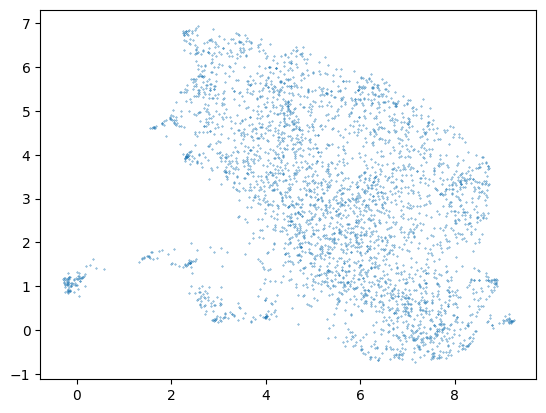

In [405]:
ump_2d = umap.UMAP(random_state=42,
                n_components=2)

umap_embedding_2d = ump_2d.fit_transform(gene_expr_matrix_np.T)
plt.scatter(umap_embedding_2d[:, 0], umap_embedding_2d[:, 1], s=0.1, cmap='Spectral')

In [418]:
ump = umap.UMAP(random_state=42,
                n_neighbors=200,
                min_dist=0.0,
                n_components=20)

umap_embedding = ump.fit_transform(gene_expr_matrix_np.T)

/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [419]:
umap_embedding.shape

(3455, 20)

In [420]:
# --- Step 3: Cluster the Embedding ---
print('*******UMAP***********')
print("Starting HDBSCAN clustering on the 20-dimensional embedding...")

# Initialize HDBSCAN with parameters from the paper [1]
clusterer = hdbscan.HDBSCAN(
    metric='euclidean',
    min_cluster_size=10,
    min_samples=10,     # what min_samples does is provide a measure of how conservative you want your clustering to be.
    cluster_selection_method='leaf'
)

# Fit the clusterer to the 20-dimensional embedding
cluster_labels = clusterer.fit_predict(umap_embedding)

print("Clustering complete.")

*******UMAP***********
Starting HDBSCAN clustering on the 20-dimensional embedding...
Clustering complete.


/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [421]:
clustered = (cluster_labels >= 0)
print(f'Only{clustered.sum() / umap_embedding.shape[0] * 100: .2f}% were assigned clusters')

Only 27.00% were assigned clusters


In [416]:
np.unique(cluster_labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 array([1891,   13,   23,   19,   16,   28,   19,   18,   29,   15,   15,
          49,   25,   16,   21,   26,   12,   26,   35,   27,   21,   18,
          20,   17,  138,   18,   12,   17,   15,   15,   40,   16,   13,
          10,   24,   17,   35,   31,   14,   18,   11,   50,   12,   13,
          10,   14,   28,   28,   16,   10,   59,   11,   40,   11,   29,
          18,   16,   51,   23,   19,   17,   75,   51,   11]))

/tmp/ipykernel_132567/719637729.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_embedding_2d[clustered, 0],


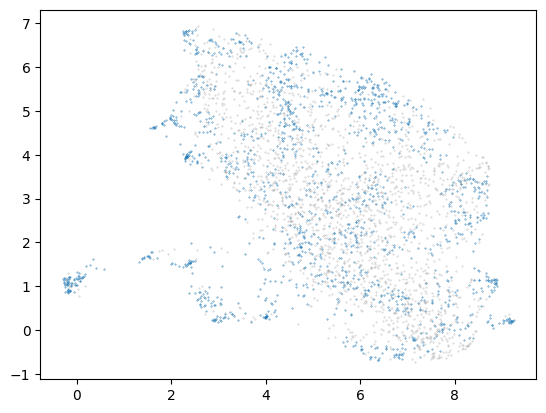

In [417]:
plt.scatter(umap_embedding_2d[~clustered, 0],
            umap_embedding_2d[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(umap_embedding_2d[clustered, 0],
            umap_embedding_2d[clustered, 1],
            s=0.1,
            cmap='Spectral');

### Conversion to PyMDE embedding and then Clustering

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Convert the gene_expr_matrix_np to shape (gene x perturbation) i.e 3455 x 3630
#                                          (samples x features)
gene_expr_matrix_np.shape

(3630, 3455)

In [354]:
# This function performs the MDE embedding with the specified constraints.
mde = pymde.preserve_neighbors( 
    gene_expr_matrix_np.T,
    embedding_dim=20,       # 20 dimensions 
    n_neighbors=7,          # n_neighbors=7 
    repulsive_fraction=5,   # repulsive_fraction=5 
    verbose=True            # Set to False for less output
)

Nov 18 04:18:55 PM: Computing 7-nearest neighbors, with max_distance=None
Nov 18 04:18:55 PM: Exact nearest neighbors by brute force 
Nov 18 04:18:56 PM: Computing quadratic initialization.


In [355]:
gene_embedding = mde.embed()
print(f'The embedding of dimension {gene_embedding.shape[1]} for each of the {gene_embedding.shape[0]} genes.')

The embedding of dimension 20 for each of the 3455 genes.


In [356]:
print(f"\nEmbedding complete. New embedding shape: {gene_embedding.shape}")


Embedding complete. New embedding shape: torch.Size([3455, 20])


In [357]:
projection = TSNE().fit_transform(gene_embedding)

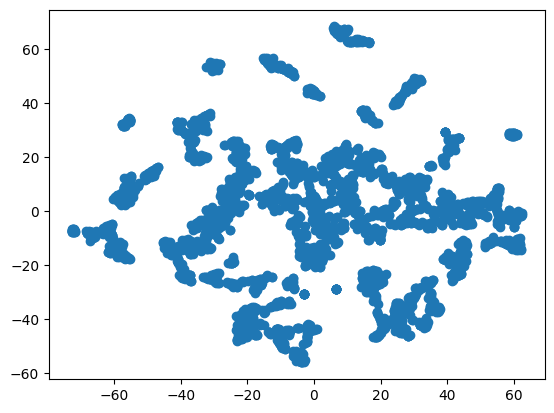

In [358]:
plt.scatter(*projection.T)

In [348]:
# --- Step 3: Cluster the Embedding ---
print("Starting HDBSCAN clustering on the 20-dimensional embedding...")

# Initialize HDBSCAN with parameters from the paper [1]
clusterer = hdbscan.HDBSCAN(
    metric='euclidean',
    min_cluster_size=10,
    min_samples=10,     # what min_samples does is provide a measure of how conservative you want your clustering to be.
    cluster_selection_method='leaf'
)

# Fit the clusterer to the 20-dimensional embedding
cluster_labels = clusterer.fit_predict(gene_embedding)

print("Clustering complete.")

Starting HDBSCAN clustering on the 20-dimensional embedding...
Clustering complete.


/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [349]:
cluster_labels

array([-1, -1, 27, ...,  5, -1,  5], shape=(3455,))

In [350]:
clusterer.probabilities_

array([0.        , 0.        , 0.64301764, ..., 1.        , 0.        ,
       1.        ], shape=(3455,))

In [351]:
np.unique(cluster_labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 array([2061,   31,   18,   25,   28,   19,   12,   54,   14,   39,   30,
          23,   27,   42,   22,   16,   15,   17,   40,   17,   24,   22,
          37,   72,   10,   34,   13,   25,   41,   35,   16,   30,   19,
          25,   23,   66,   50,   26,   52,   31,   73,   21,   17,   42,
          22,   46,   33]))

In [368]:
clustered = (cluster_labels >=0)
print(f'Only{clustered.sum() / gene_embedding.shape[0] * 100: .2f}% were assigned clusters')

Only 40.35% were assigned clusters


In [361]:
clustered

array([False, False,  True, ...,  True, False,  True], shape=(3455,))

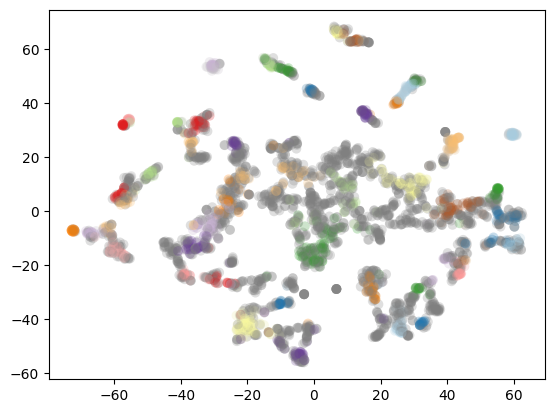

In [359]:
color_palette = sns.color_palette('Paired', 12)
cluster_color = [color_palette[x % len(color_palette)] if x >= 0
                 else (0.5, 0.5, 0.5)
                 for x in cluster_labels]
cluster_member_colors = [sns.desaturate(x,p) for x,p in 
                         zip(cluster_color, clusterer.probabilities_)]
plt.scatter(*projection.T,s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [260]:
color_palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)]

<Axes: ylabel='$\\lambda$ value'>

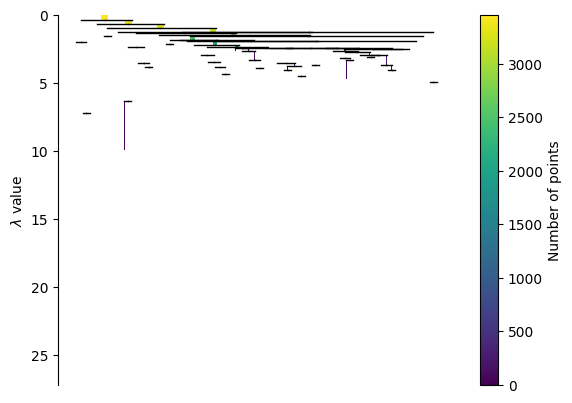

In [82]:
clusterer.condensed_tree_.plot()

### CLustering with PCA embedding

In [225]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [108]:
gene_expr_matrix_np.shape

(3630, 3455)

In [226]:
pca = PCA(n_components=50)
pca_embedding = pca.fit_transform(gene_expr_matrix_np.T)

In [227]:
pca_embedding.shape

(3455, 50)

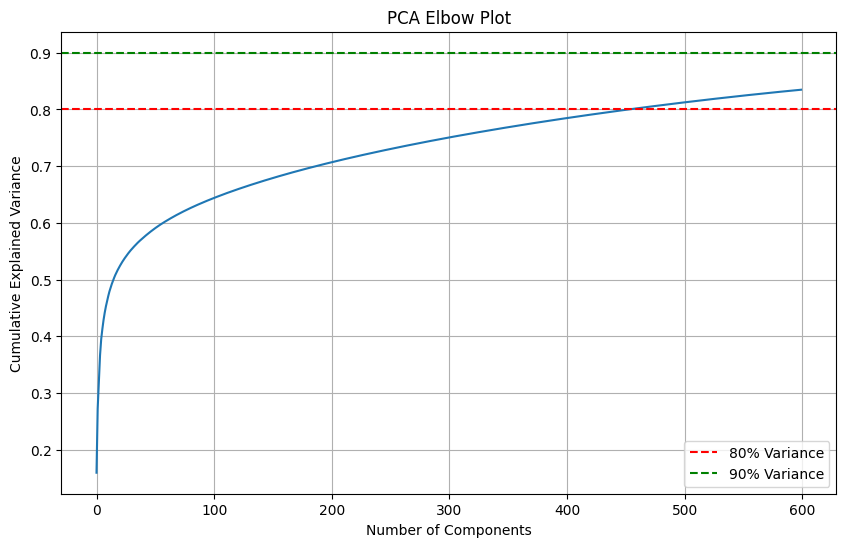

In [162]:
# Plot Cumulative Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Plot')
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

In [153]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15923655, 0.27218794, 0.32003834, 0.36624013, 0.39494881,
       0.41302693, 0.42876283, 0.44170993, 0.45264656, 0.46203686,
       0.47088578, 0.47897029, 0.48577768, 0.49210808, 0.49790834,
       0.50314573, 0.50810694, 0.51251752, 0.51675065, 0.52068668,
       0.52437935, 0.5279773 , 0.53137508, 0.53459795, 0.53765186,
       0.54060317, 0.54347456, 0.54619414, 0.54884159, 0.55136288,
       0.55375157, 0.55607976, 0.55832662, 0.56054117, 0.562716  ,
       0.56480206, 0.56682085, 0.56871911, 0.57058215, 0.57242223,
       0.57425031, 0.57603309, 0.5777867 , 0.57949903, 0.58118989,
       0.5828569 , 0.58448001, 0.58608311, 0.58766725, 0.58920328,
       0.59071258, 0.59219287, 0.5936668 , 0.59508221, 0.59647285,
       0.59783947, 0.59915776, 0.60046019, 0.60174258, 0.60301587,
       0.60426676, 0.60548627, 0.60669859, 0.60789787, 0.60908792,
       0.61025533, 0.61141979, 0.61256262, 0.61368439, 0.61479384,
       0.61588161, 0.6169648 , 0.61804081, 0.61909853, 0.62014

In [194]:
# --- Step 3: Cluster the Embedding ---
print("Starting HDBSCAN clustering on the PCA Data...")

# Initialize HDBSCAN with parameters from the paper [1]
clusterer = hdbscan.HDBSCAN(
    metric='euclidean',
    min_cluster_size=10,
    min_samples=10,
    cluster_selection_method='leaf'
)

# Fit the clusterer to the Raw Data
cluster_labels = clusterer.fit_predict(pca_embedding)

print("Clustering complete.")

Starting HDBSCAN clustering on the PCA Data...


/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clustering complete.


In [195]:
np.unique(cluster_labels, return_counts=True)

(array([-1,  0,  1]), array([ 255, 3188,   12]))

In [196]:
cluster_labels

array([ 0,  0, -1, ..., -1, -1, -1], shape=(3455,))

### Clustering without Embedding

In [83]:
gene_expr_matrix_np.shape

(3630, 3455)

In [84]:
# --- Step 3: Cluster the Embedding ---
print("Starting HDBSCAN clustering on the Raw Expression Data...")

# Initialize HDBSCAN with parameters from the paper [1]
clusterer = hdbscan.HDBSCAN(
    metric='euclidean',
    min_cluster_size=10,
    min_samples=10,
    cluster_selection_method='leaf'
)

# Fit the clusterer to the Raw Data
cluster_labels = clusterer.fit_predict(gene_expr_matrix_np.T)

print("Clustering complete.")

Starting HDBSCAN clustering on the Raw Expression Data...


/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/azlaanmsamad/anaconda3/envs/perturb-seq_reploge/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clustering complete.


In [87]:
np.unique(cluster_labels, return_counts=True)

(array([-1]), array([3455]))

In [88]:
cluster_labels

array([-1, -1, -1, ..., -1, -1, -1], shape=(3455,))

In [91]:
len(cluster_labels)

3455

## Analysis

In [57]:
# --- Step 4: Show Results ---
# Add the new cluster labels as a column to our DataFrame
gene_expr_matrix_df['gene_program_cluster_id'] = cluster_labels

# Count the results
num_clusters = len(np.unique(cluster_labels[cluster_labels!= -1]))
num_unclustered = np.sum(cluster_labels == -1)

print(f"\n--- Clustering Results ---")
print(f"Total genes analyzed: {len(cluster_labels)}")
print(f"Number of gene expression programs (clusters) found: {num_clusters}")
print(f"Total genes not assigned to a program (noise, ID -1): {num_unclustered}")

# Display the genes from the first few programs as an example
if num_clusters > 0:
    print("\n--- Example Programs ---")
    # Show up to 5 examples (clusters 0, 1, 2, 3, 4)
    for i in range(min(num_clusters, 5)): 
        # Get gene names from the original DataFrame index
        program_genes = gene_expr_matrix_df[gene_expr_matrix_df['gene_program_cluster_id'] == i].index.get_level_values(0).tolist()
        print(f"\nProgram {i} ({len(program_genes)} genes):")
        # Show first 10 genes in the program
        print(program_genes[:10])

ValueError: Length of values (3630) does not match length of index (3455)

In [84]:
t_transpose

gene_transcript,10005_ZBTB4_P1_ENSG00000174282,10006_ZBTB5_P1P2_ENSG00000168795,10015_ZBTB8OS_P1P2_ENSG00000176261,10020_ZC3H13_P1P2_ENSG00000123200,10022_ZC3H15_P1P2_ENSG00000065548,10023_ZC3H18_P1P2_ENSG00000158545,10024_ZC3H3_P1P2_ENSG00000014164,10025_ZC3H4_P1_ENSG00000130749,10029_ZC3H8_P1P2_ENSG00000144161,10030_ZC3HAV1_P1P2_ENSG00000105939,...,995_C16orf72_P1_ENSG00000182831,9961_ZBED1_P1P2_ENSG00000214717,9971_ZBTB14_P1P2_ENSG00000198081,9975_ZBTB17_P1P2_ENSG00000116809,998_C16orf87_P1P2_ENSG00000155330,9990_ZBTB38_P2_ENSG00000177311,9991_ZBTB38_P1_ENSG00000177311,9992_ZBTB39_P1P2_ENSG00000166860,9998_ZBTB44_P1P2_ENSG00000196323,9_AAR2_P1P2_ENSG00000131043
ENSG00000188976,-0.030201,-0.094131,0.042972,-0.120841,-0.069962,0.181084,-0.121025,-0.105775,0.084059,-0.127124,...,-0.030833,-0.025837,-0.366064,-0.102884,-0.011301,-0.023088,0.032109,-0.054780,0.166343,0.313340
ENSG00000187961,-0.088615,0.093585,-0.122381,-0.013023,0.045348,0.003317,-0.032793,0.047067,-0.322442,0.111247,...,-0.035528,-0.040510,0.015084,-0.011796,0.060061,0.074530,0.040046,-0.051475,0.202679,0.215871
ENSG00000187608,0.097081,0.041780,0.015089,0.690666,-0.056278,-0.019333,-0.050711,0.238758,0.471458,-0.048665,...,-0.004630,0.088555,0.327600,-0.089067,-0.145072,-0.028234,0.105273,0.206940,-0.026491,0.256190
ENSG00000160087,-0.050281,0.011111,-0.010220,0.369722,0.054014,0.298829,0.056415,0.259702,0.349829,-0.075616,...,-0.068457,0.123589,0.379641,-0.014637,0.010407,-0.102966,0.070274,0.023562,-0.038248,0.451411
ENSG00000127054,0.053923,0.049495,0.021991,0.229487,0.087813,0.189635,-0.081437,-0.084950,-0.191625,-0.028424,...,0.109910,0.023895,0.273718,-0.004725,0.058715,0.021527,0.090874,-0.088279,0.146278,-0.083404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000212907,0.293088,-0.156901,-0.149914,0.302818,-0.107827,0.279020,0.189161,0.123668,0.356196,0.012751,...,-0.013168,-0.041959,0.998143,0.303521,0.137244,-0.107828,0.058422,-0.165814,0.115760,-0.469845
ENSG00000198886,0.485888,-0.037597,-0.079422,0.341236,-0.124266,0.695523,0.475465,-0.037058,0.155367,0.059756,...,0.094342,0.010496,-2.032150,0.336144,-0.228467,0.039389,0.086549,0.636640,0.009843,-0.626666
ENSG00000198786,0.890428,0.021802,0.134310,-0.045770,-0.230523,0.480635,-0.040907,0.134265,-0.720064,0.090691,...,-0.028117,-0.006694,-0.089038,0.088591,-0.059542,-0.131908,0.084963,0.252488,0.058135,-0.485737
ENSG00000198695,0.252083,0.063851,-0.018046,0.586778,-0.098643,0.044708,-0.177609,0.558775,-0.418281,-0.048558,...,-0.056195,-0.018621,-0.554502,0.269156,0.243274,0.007189,-0.000500,-0.188369,0.210319,-0.277092


In [85]:
import anndata as ad

andata =  ad.read_h5ad('data/K562_gwps_normalized_bulk_01.h5ad')
andata

AnnData object with n_obs × n_vars = 11258 × 8248
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'

In [86]:
andata.var

,gene_name,mean,std,cv,in_matrix,gini,clean_mean,clean_std,clean_cv
gene_id,,,,,,,,,
ENSG00000237491,LINC01409,0.114359,0.033798,0.295547,True,0.153642,0.117205,0.034833,0.297200
ENSG00000228794,LINC01128,0.178166,0.040590,0.227822,True,0.122999,0.182778,0.041933,0.229419
ENSG00000188976,NOC2L,1.375142,0.162536,0.118196,True,0.063150,1.411069,0.164344,0.116468
ENSG00000187961,KLHL17,0.102961,0.030863,0.299751,True,0.162265,0.105230,0.031627,0.300552
ENSG00000188290,HES4,0.237189,0.057237,0.241315,True,0.127442,0.242638,0.058972,0.243044
...,...,...,...,...,...,...,...,...,...
ENSG00000198727,MT-CYB,113.862961,11.825139,0.103854,True,0.049504,116.198235,11.865300,0.102113
ENSG00000278704,BX004987.1,0.190622,0.042857,0.224826,True,0.119867,0.195459,0.044112,0.225684
ENSG00000278384,AL354822.1,0.187205,0.042461,0.226814,True,0.121514,0.191764,0.043733,0.228057


In [92]:
code_to_name_dict = dict(andata.var['gene_name'])

In [ ]:
name_to_code_dict = {v:k for k,v in code_to_name_dict.items()}
name_to_code_dict

In [125]:
gene_code_matrix = gene_expr_matrix_df.index.to_list()
gene_name_matrix = [code_to_name_dict[code] for code in gene_code_matrix]

In [126]:
predicted_cluster_full = pd.DataFrame({'gene_name': gene_name_matrix,
                                       'gene_code': gene_code_matrix,
                                       'predicted_cluster': cluster_labels})

In [127]:
predicted_cluster_full

,gene_name,gene_code,predicted_cluster
0,NOC2L,ENSG00000188976,-1
1,KLHL17,ENSG00000187961,-1
2,ISG15,ENSG00000187608,-1
3,UBE2J2,ENSG00000160087,26
4,INTS11,ENSG00000127054,-1
...,...,...,...
3450,MT-ND4L,ENSG00000212907,1
3451,MT-ND4,ENSG00000198886,1
3452,MT-ND5,ENSG00000198786,1
3453,MT-ND6,ENSG00000198695,-1


In [83]:
HVG_df = pd.read_csv("data/highly_responsive_gene_2319.csv", index_col=None)
HVG_df

,gene_name,cluster
0,CYP51A1,4
1,BAD,-1
2,CD99,-1
3,MAD1L1,29
4,CFLAR,19
...,...,...
2314,AC139493.2,-1
2315,POLR2J3,-1
2316,BX890604.2,-1
2317,AC016074.2,5


In [141]:
predicted_cluster_for_new_genes = {}
predicted_cluster_for_known_genes = {}
true_ = []
for id, gene_code in enumerate(gene_expr_matrix_df.index.to_list()):
    gene_name = code_to_name_dict[gene_code]
    if gene_name in HVG_df['gene_name'].to_list():
        predicted_cluster_for_known_genes[gene_name] = cluster_labels[id].item() # 
        true_.append(HVG_df[HVG_df["gene_name"] == gene_name]['cluster'].item())
    else:
        predicted_cluster_for_new_genes[gene_name] = cluster_labels[id].item()
        true_.append(np.nan)
    

In [142]:
predicted_cluster_full['true'] = true_
predicted_cluster_full

,gene_name,gene_code,predicted_cluster,true
0,NOC2L,ENSG00000188976,-1,34.0
1,KLHL17,ENSG00000187961,-1,NaN
2,ISG15,ENSG00000187608,-1,19.0
3,UBE2J2,ENSG00000160087,26,-1.0
4,INTS11,ENSG00000127054,-1,NaN
...,...,...,...,...
3450,MT-ND4L,ENSG00000212907,1,0.0
3451,MT-ND4,ENSG00000198886,1,0.0
3452,MT-ND5,ENSG00000198786,1,0.0
3453,MT-ND6,ENSG00000198695,-1,0.0


In [ ]:
#predicted_cluster_full.to_csv('data/predicted_full_cluster.csv', index=None)

In [136]:
gene_no_match = []
true, pred = [], []
for k, v in predicted_cluster_for_known_genes.items():
    tr = HVG_df[HVG_df['gene_name']==k]['cluster'].item()
    #print(f"for Gene {k}: True: {tr} and Predicted: {v}")
    if HVG_df[HVG_df['gene_name']==k]['cluster'].item() != v:
        gene_no_match.append(k)
        true.append(tr)
        pred.append(v)

In [137]:
gene_no_match, true, pred

(['NOC2L',
  'ISG15',
  'UBE2J2',
  'AURKAIP1',
  'ATAD3B',
  'ATAD3A',
  'FAAP20',
  'RPL22',
  'PARK7',
  'ENO1',
  'DFFA',
  'SRM',
  'MAD2L2',
  'NECAP2',
  'SDHB',
  'MRTO4',
  'CAPZB',
  'MICOS10',
  'DDOST',
  'KDM1A',
  'HNRNPR',
  'RPL11',
  'PITHD1',
  'SYF2',
  'RSRP1',
  'TMEM50A',
  'AUNIP',
  'STMN1',
  'ZNF593',
  'SH3BGRL3',
  'NUDC',
  'ATP5IF1',
  'SESN2',
  'SNHG3',
  'SNHG12',
  'TAF12',
  'YTHDF2',
  'EPB41',
  'SRSF4',
  'LAPTM5',
  'CCDC28B',
  'BSDC1',
  'RBBP4',
  'KIAA1522',
  'YARS',
  'AK2',
  'PSMB2',
  'CLSPN',
  'AGO3',
  'MAP7D1',
  'THRAP3',
  'EVA1B',
  'MRPS15',
  'C1orf109',
  'AKIRIN1',
  'NDUFS5',
  'PABPC4',
  'PPIE',
  'CAP1',
  'RLF',
  'SMAP2',
  'PPIH',
  'YBX1',
  'ERMAP',
  'SLC2A1',
  'EBNA1BP2',
  'CDC20',
  'MED8',
  'ATP6V0B',
  'EIF2B3',
  'UROD',
  'PRDX1',
  'NASP',
  'UQCRH',
  'FAF1',
  'TXNDC12',
  'COA7',
  'MAGOH',
  'HSPB11',
  'TMEM59',
  'MRPL37',
  'DHCR24',
  'NFIA',
  'USP1',
  'JAK1',
  'SERBP1',
  'SRSF11',
  'ZRANB2',
  

In [138]:
predicted_cluster_df = pd.DataFrame({'gene_name': gene_no_match,
                                    'true': true,
                                    'predicted': pred})
predicted_cluster_df

,gene_name,true,predicted
0,NOC2L,34,-1
1,ISG15,19,-1
2,UBE2J2,-1,26
3,AURKAIP1,22,36
4,ATAD3B,-1,27
...,...,...,...
1685,MT-ND4L,0,1
1686,MT-ND4,0,1
1687,MT-ND5,0,1
1688,MT-ND6,0,-1


All Genes match the original cluster mentioned in the paper!!